# Analyze jet.out ------ OpenFast:

### Import Packages

In [4]:
import sys

#sys.path.append("/Volumes/pdoubraw-1/repos/ABLTools/python/")
sys.path.append("C:/Users/krydalch/Documents/Repos/ABLtools_python/")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob, os
import functions as f
import stochasticTurbulenceTools as stt


sys.path.append("C:/Users/krydalch/Documents/Repos/")
from datatools import wfip2
from datatools.remote_sensing import scintec_profiler


plt.rc("font",size=14)

### Import .jet as CSV file

In [5]:
data1 = pd.read_csv("C:/Users/krydalch/Desktop/OPENfast/Outputs (jet.out)/jet_10MW_avg_vel_1.out",skiprows = 4, header = [1,2], sep = '\s+')
data1 = data1.set_index(data1.iloc[:,0])
master_df1 = data1.copy()
cols = data1.columns.values

data2 = pd.read_csv("C:/Users/krydalch/Desktop/OPENfast/Outputs (jet.out)/jet_10MW_1820_rand1.out",skiprows = 4, header = [1,2], sep = '\s+')
data2 = data2.set_index(data2.iloc[:,0])
master_df2 = data2.copy()
cols2 = data2.columns.values

data3 = pd.read_csv("C:/Users/krydalch/Desktop/OPENfast/Outputs (jet.out)/jet_10MW_1440_rand1.out",skiprows = 4, header = [1,2], sep = '\s+')
data3 = data3.set_index(data3.iloc[:,0])
master_df3 = data3.copy()
col3 = data3.columns.values

data4 = pd.read_csv("C:/Users/krydalch/Desktop/OPENfast/Outputs (jet.out)/jet_10MW_max_vel_1.out",skiprows = 4, header = [1,2], sep = '\s+')
data4 = data4.set_index(data4.iloc[:,0])
master_df4 = data4.copy()
cols4 = data4.columns.values

In [16]:
fig_labels = {'RootFxb1':"Force at Blade Root along $x$ [N]"}
colors     = {"jet":'r',"mixed":'g'}

Text(0, 0.5, 'Force at Blade Root along $x$ [N]')

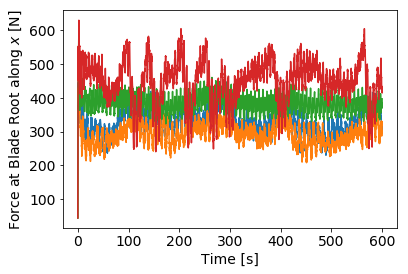

In [18]:
varname = 'RootFxb1'

fig = plt.figure()
ax  = fig.add_subplot(111)

for dataset in [data1,data2,data3,data4]:
    ax.plot(dataset[varname])
# ax.set_title(fig_labels[varname])
ax.set_xlabel("Time [s]")
ax.set_ylabel(fig_labels[varname])

In [19]:
from scipy.signal import welch

0.05

array([ 44.57,  76.22, 133.9 , ..., 319.3 , 318.3 , 315.5 ])

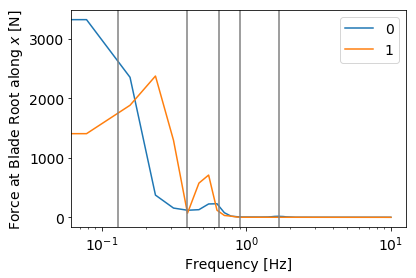

In [45]:
varname = 'RootFxb1'

fig = plt.figure()
ax  = fig.add_subplot(111)

i=0
for dataset in [data2,data3]:
    dt=np.diff(dataset[varname].index)[0]
    [f,P]=welch(np.squeeze(dataset[varname].values),fs=1/dt)
    ax.semilogx(f,P,label="{0}".format(i))
    i += 1
# ax.set_title(fig_labels[varname])
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel(fig_labels[varname])
for i in [1,3,5,7,13]:
    ax.axvline(x=i*0.128333333,color='gray')
plt.legend(loc='best')

In [36]:
(7.7/60.)

0.12833333333333333

In [6]:
cols

array([('Time', '(s)'), ('Wind1VelX', '(m/s)'), ('Wind1VelY', '(m/s)'),
       ('Wind1VelZ', '(m/s)'), ('Wind2VelX', '(m/s)'),
       ('Wind2VelY', '(m/s)'), ('Wind2VelZ', '(m/s)'),
       ('Wind3VelX', '(m/s)'), ('Wind3VelY', '(m/s)'),
       ('Wind3VelZ', '(m/s)'), ('Wind4VelX', '(m/s)'),
       ('Wind4VelY', '(m/s)'), ('Wind4VelZ', '(m/s)'),
       ('BlPitch1', '(deg)'), ('BlPitch2', '(deg)'),
       ('BlPitch3', '(deg)'), ('YawPzn', '(deg)'), ('YawVzn', '(deg/s)'),
       ('YawAzn', '(deg/s^2)'), ('YawBrTDxt', '(m)'),
       ('YawBrTDyt', '(m)'), ('YawBrTDzt', '(m)'), ('YawBrRDxt', '(deg)'),
       ('YawBrRDyt', '(deg)'), ('YawBrRDzt', '(deg)'),
       ('RootFxb1', '(kN)'), ('RootFyb1', '(kN)'), ('RootFxb2', '(kN)'),
       ('RootFyb2', '(kN)'), ('RootFxb3', '(kN)'), ('RootFyb3', '(kN)'),
       ('LSShftFxa', '(kN)'), ('LSShftMxa', '(kN-m)'), ('RotPwr', '(kW)'),
       ('HSShftTq', '(kN-m)'), ('TwrBsFxt', '(kN)'), ('TwrBsFyt', '(kN)'),
       ('TwrBsFzt', '(kN)'), ('TwrBsMxt', '(kN

### Plot Wind Speeds to ensure they are experiencing same flow

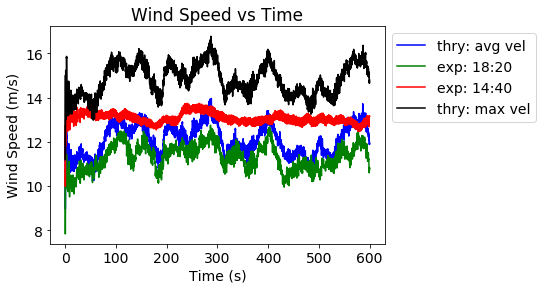

In [12]:
name = 'RtVAvgxh'
U1 = master_df1[name]
U2 = master_df2[name]
U3 = master_df3[name]
U4 = master_df4[name]
plt.plot(U1,'b',label='thry: avg vel')
plt.plot(U2,'g',label='exp: 18:20')
plt.plot(U3,'r',label='exp: 14:40')
plt.plot(U4,'k',label='thry: max vel')
plt.title('Wind Speed vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Wind Speed (m/s)')
plt.legend(bbox_to_anchor=(1,1))


(rpm)    7.32175
dtype: float64
(rpm)    6.856271
dtype: float64
(rpm)    7.717338
dtype: float64
(rpm)    9.281534
dtype: float64


Text(0, 0.5, 'Rotor Speed (rad/s)')

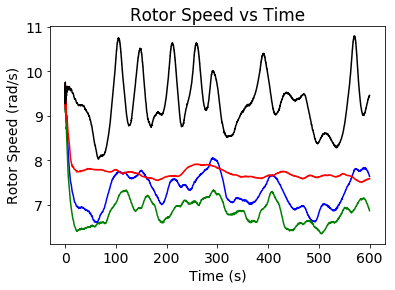

In [30]:
name = 'RtSpeed'
U1 = master_df1[name]
U2 = master_df2[name]
U3 = master_df3[name]
U4 = master_df4[name]
plt.plot(U1,'b',label='thry: avg vel')
plt.plot(U2,'g',label='exp: 18:20')
plt.plot(U3,'r',label='exp: 14:40')
plt.plot(U4,'k',label='thry: max vel')
for Utmp in [U1,U2,U3,U4]:
    print(np.mean(Utmp))
plt.title('Rotor Speed vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Rotor Speed (rad/s)')
#plt.legend()


### Plot Force acting on the tower base in x direction

Text(0, 0.5, '[Newtons]')

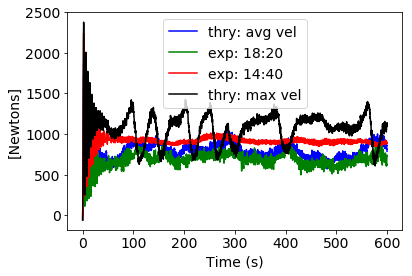

In [9]:
name = 'TwrBsFxt'
U1 = master_df1[name]
U2 = master_df2[name]
U3 = master_df3[name]
U4 = master_df4[name]
plt.plot(U1,'b',label='thry: avg vel')
plt.plot(U2,'g',label='exp: 18:20')
plt.plot(U3,'r',label='exp: 14:40')
plt.plot(U4,'k',label='thry: max vel')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('[Newtons]')



### Moment Y at Tower Base


Text(0, 0.5, '[N*m]')

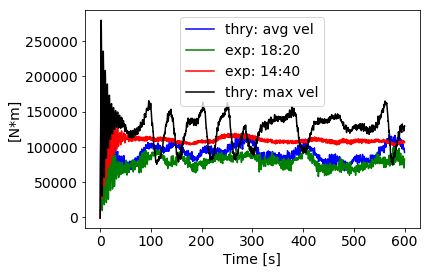

In [10]:
name = 'TwrBsMyt'
U1 = master_df1[name]
U2 = master_df2[name]
U3 = master_df3[name]
U4 = master_df4[name]
plt.plot(U1,'b',label='thry: avg vel')
plt.plot(U2,'g',label='exp: 18:20')
plt.plot(U3,'r',label='exp: 14:40')
plt.plot(U4,'k',label='thry: max vel')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('[N*m]')


Text(0, 0.5, '[deg]')

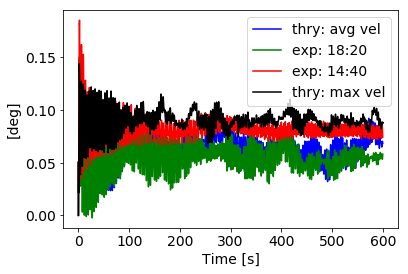

In [11]:
name = 'YawBrRDxt'
U1 = master_df1[name]
U2 = master_df2[name]
U3 = master_df3[name]
U4 = master_df4[name]
plt.plot(U1,'b',label='thry: avg vel')
plt.plot(U2,'g',label='exp: 18:20')
plt.plot(U3,'r',label='exp: 14:40')
plt.plot(U4,'k',label='thry: max vel')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('[deg]')